In [122]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import mne
import seaborn as sns
import warnings
import numpy as np
from collections import defaultdict
warnings.filterwarnings('ignore')
%matplotlib notebook
%matplotlib inline

In [123]:
path_kz = 'recordings/EEG_baseline_with_markers_depr_research/EEG_baseline_Kz_2020/'
path_bl_markers = 'recordings/EEG_baseline_with_markers_depr_research/EEG_baseline_with_markers/'
path_markers_rus = 'recordings/EEG_baseline_with_markers_depr_research/EEG_baseline_with_markers_rus_2020/'

# KZ data

In [124]:
class_map_kz = {elem : idx for idx, elem in enumerate(os.listdir(path_kz))}
class_map_kz

In [126]:
def get_mean_over_channels(path_to_data, class_map):
    patient_dict = {}
    for cls in os.listdir(path_to_data):
        for elem in os.listdir(f'{path_to_data}/{cls}'):
            if 'clean' not in elem:
                continue
            eeg_data = mne.io.read_raw_fif(f'{path_to_data}/{cls}/{elem}', verbose = False)
            names = eeg_data.ch_names
            names = np.append(names, 'class label')
            values = eeg_data.get_data(picks = eeg_data.ch_names).mean(axis = 1)
            values = np.append(values, class_map[cls])
            elem = elem.removesuffix('.fif')
            patient_dict[elem] = dict(zip(names, values))
    return patient_dict

In [211]:
def check_electrodes_homogenity(patients_dict):
    cont = {}
    for elem in patients_dict.values():
        for electrode in elem.keys():
            if electrode not in cont:
                cont[electrode] = 0
            else: 
                cont[electrode] += 1
    flag = False
    for key in cont.keys():
        if len(cont.keys()) - cont[key] > 1:
            print (f'Bad channel {key} : {cont[key]}')
            flag = True
    if flag is False:
        print('Everything is OK')

In [198]:
def create_df(patient_dict, electrode_list):
    container = []
    for patient in patient_dict:
        columns = list(electrode_list.keys())
        pat = []
        for elem in columns:
            pat.append(patient_dict[patient][elem])
        container.append(pat)
    container = np.array(container)
    data = pd.DataFrame(container, columns = columns)
    data.insert(0, 'patient_name', list(patient_dict.keys()))
    return data

In [199]:
kz_patients = get_mean_over_channels(path_kz, class_map_kz)
check_electrodes_homogenity(kz_patients) 

Everything is OK


In [200]:
kz_dataframe = create_df(kz_patients, cont)
kz_dataframe.to_csv('kz_data_clean.csv', index = False)
kz_dataframe.drop(['patient_name'], axis = 1, inplace = True)

# Create junk data

In [201]:
def get_mean_over_channels_junk(path_to_data, class_map):
    patient_dict = {}
    for cls in os.listdir(path_to_data):
        for elem in os.listdir(f'{path_to_data}/{cls}'):
            if 'clean' in elem:
                continue
            eeg_data = mne.io.read_raw_edf(f'{path_to_data}/{cls}/{elem}', verbose = False)
            names = eeg_data.ch_names
            for idx, n in enumerate(names):
                n = n.removeprefix('EEG ')
                n = n.removesuffix('-R')
                n = n.lower()
                n = n[0].upper() + n[1:]
                names[idx] = n
            names = np.append(names, 'class label')
            values = eeg_data.get_data(picks = eeg_data.ch_names).mean(axis = 1)
            values = np.append(values, class_map[cls])
            elem = elem.removesuffix('.edf')
            patient_dict[elem] = dict(zip(names, values))
    return patient_dict

In [202]:
kz_pt = get_mean_over_channels_junk(path_kz, class_map_kz)
check_electrodes_homogenity(kz_pt) 

Everything is OK


In [203]:
kz_df = create_df(kz_pt, cont)
kz_df.to_csv('kz_data_junk.csv', index = False)
kz_df.drop(['patient_name'], axis = 1, inplace = True)

In [204]:
def plot_elec_prop(data, label_column = 'class label', mdd = 0, health = 1, 
                   electrodes_to_plot = ['Fp2', 'Fz', 'Fp1', 'F3', 'F7', 'F4', 'F8']):
    fig, ax = plt.subplots(nrows = 1, ncols = len(electrodes_to_plot), figsize = (30, 3))
    for idx, electrode in enumerate(electrodes_to_plot):
        ax[idx].hist(data[data[label_column] == mdd][electrode].to_numpy(), alpha= 0.5); # mdd
        ax[idx].hist(data[data[label_column] == health][electrode].to_numpy(), alpha= 0.5); # health
        ax[idx].set_title(electrode)

# Junk data

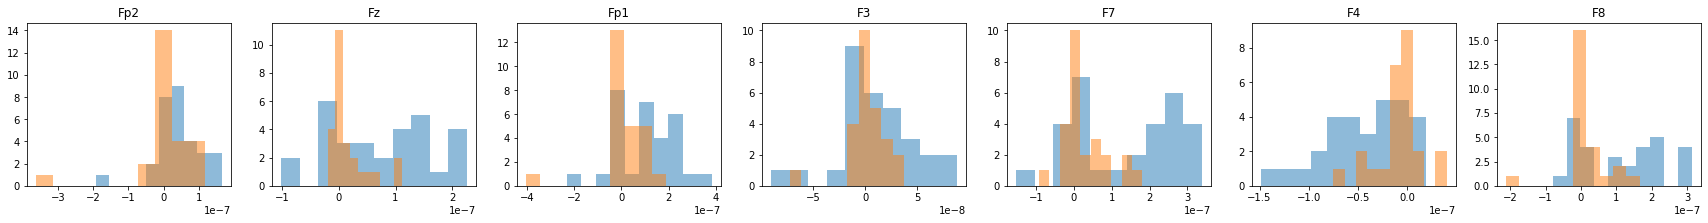

In [205]:
plot_elec_prop(kz_df)

# Cleaned data

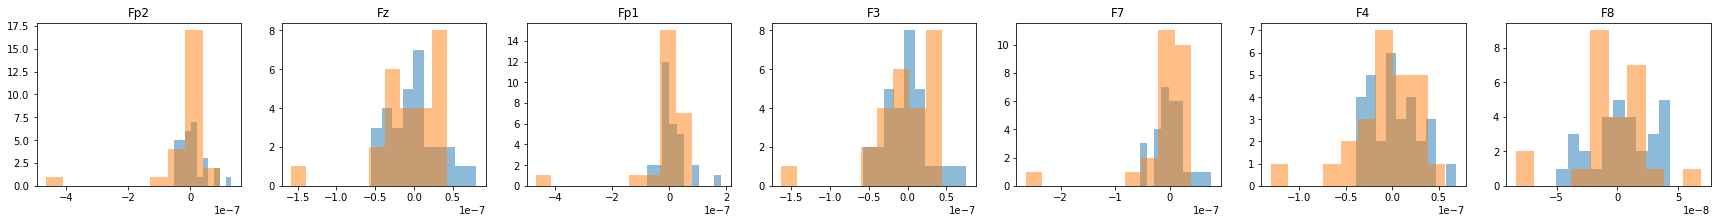

In [206]:
plot_elec_prop(kz_dataframe)

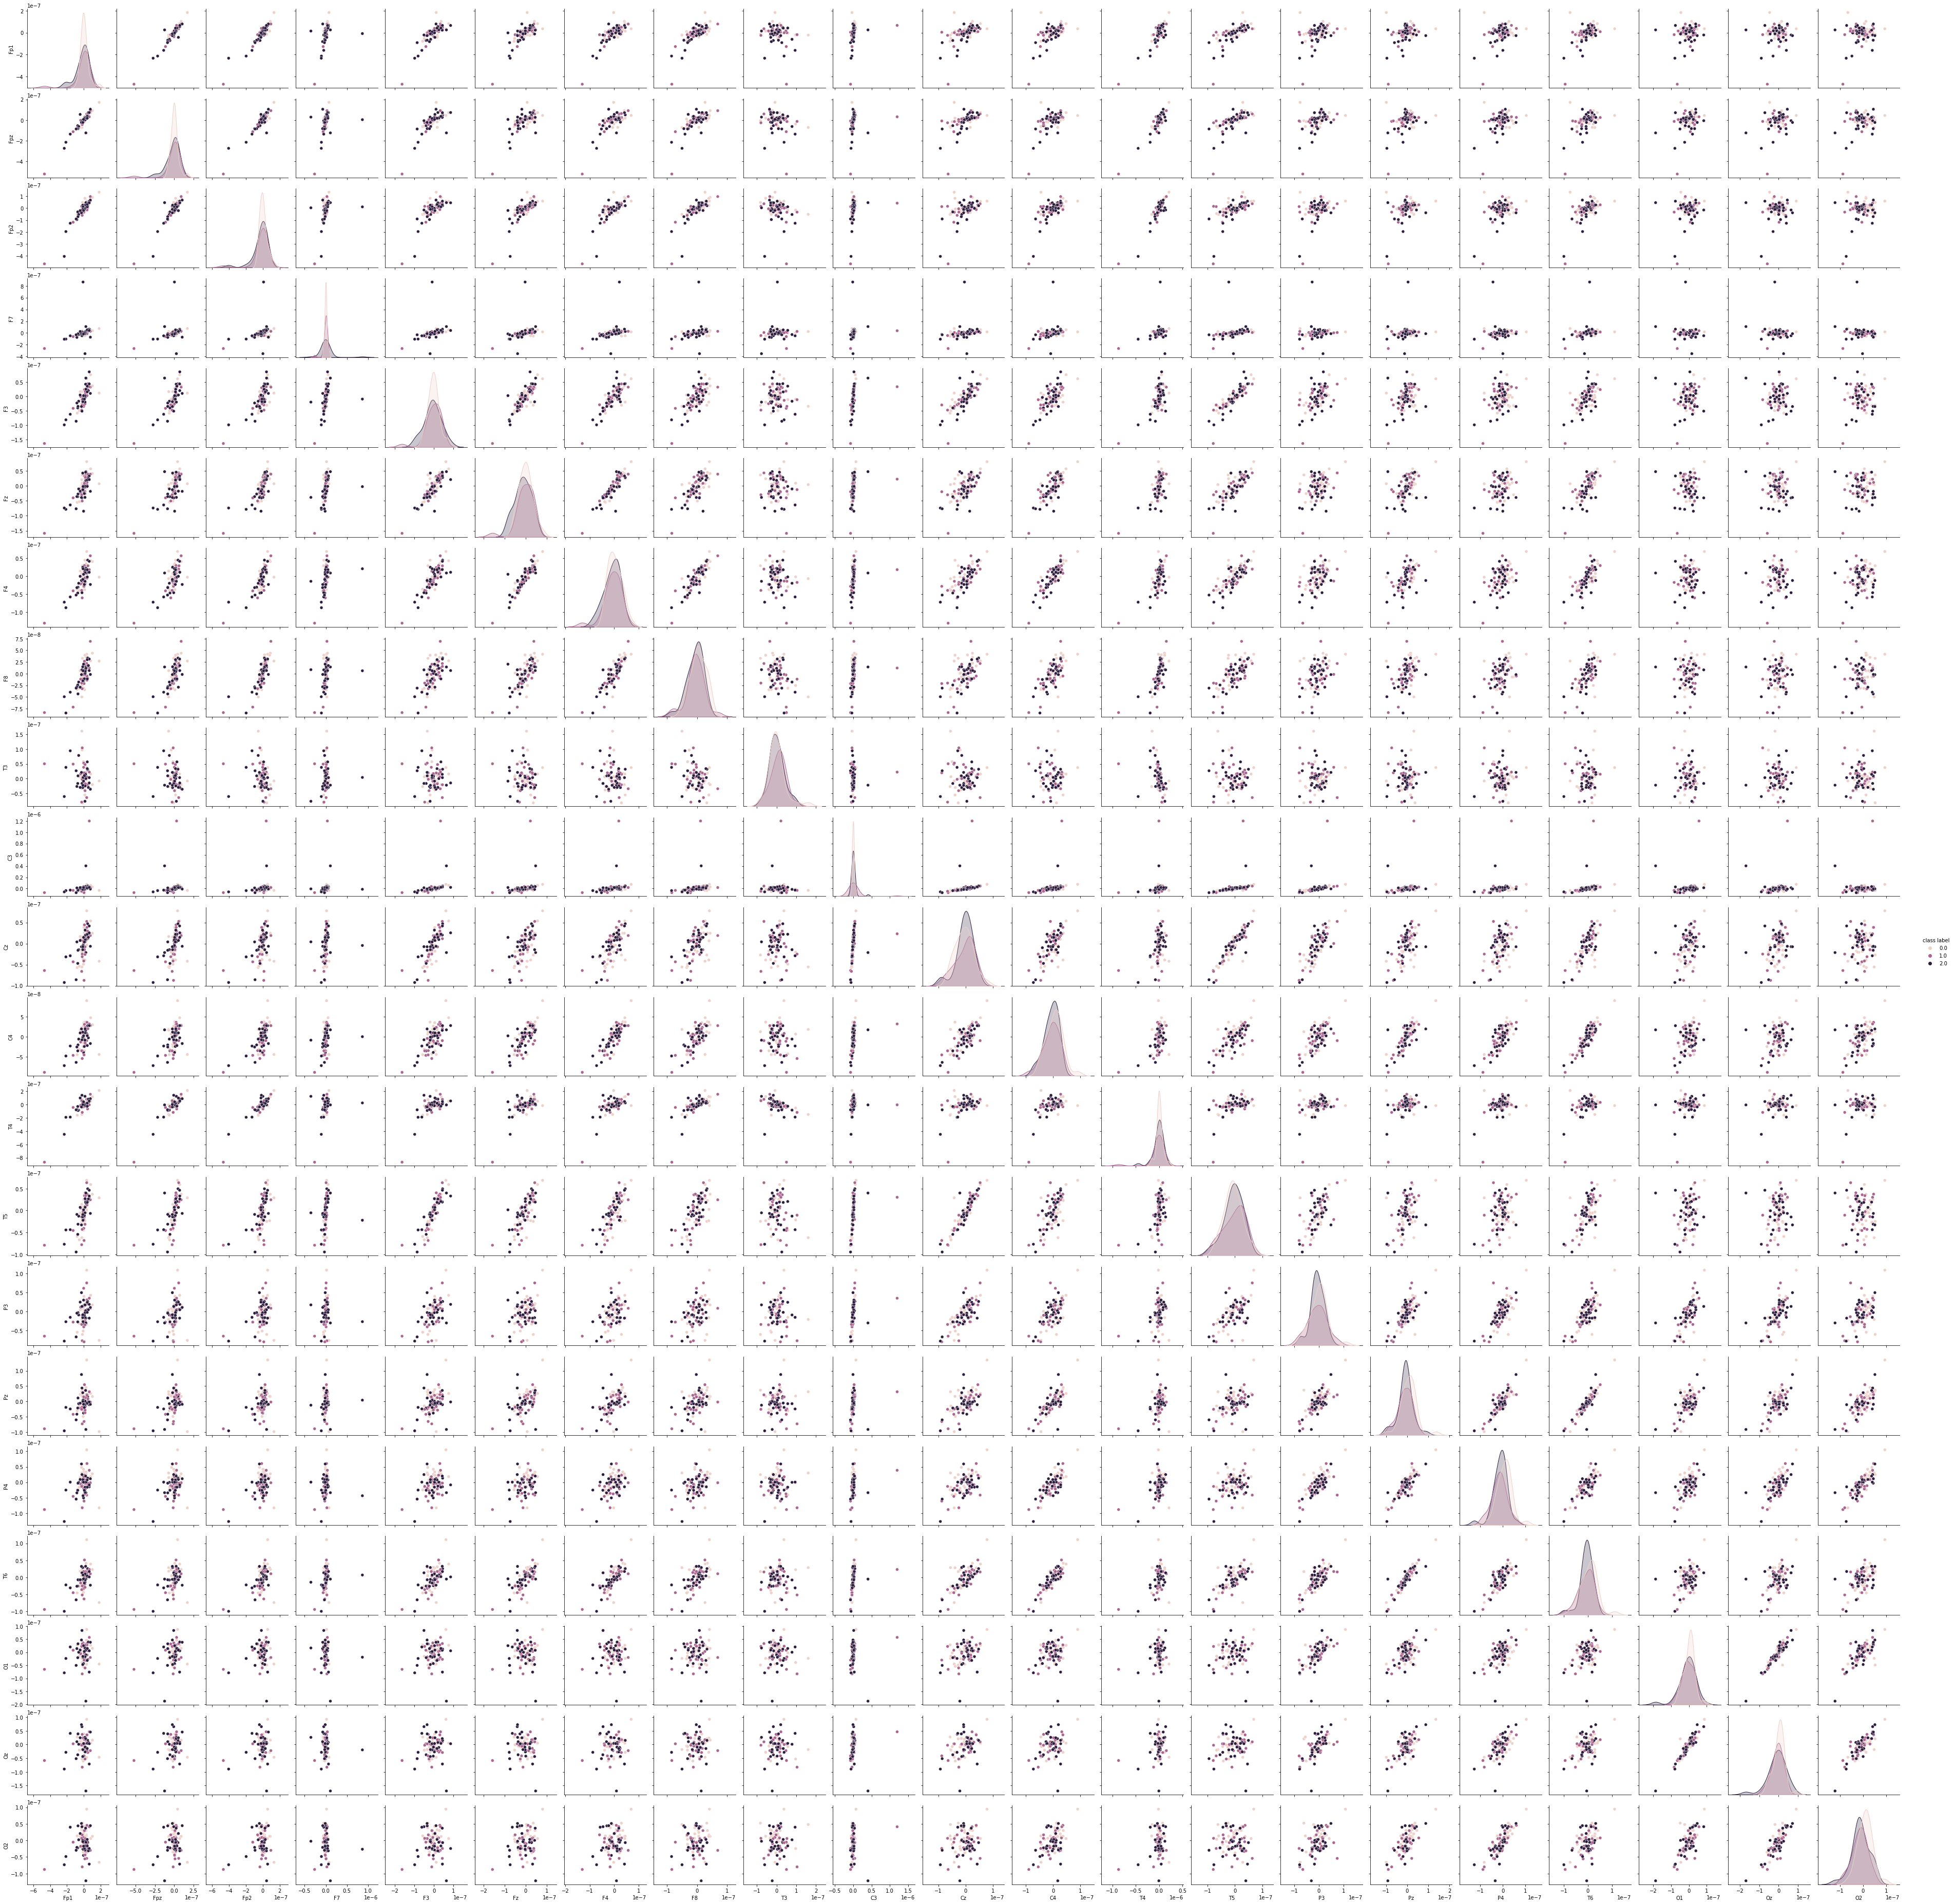

In [12]:
# sns.pairplot(data = kz_dataframe, hue = 'class label');

# Markers rus

## Clean data

In [207]:
class_map_markers_rus = {elem : idx for idx, elem in enumerate(os.listdir(path_markers_rus))}
class_map_markers_rus

{'MDD': 0, 'Health': 1}

In [208]:
markers_rus_patients = get_mean_over_channels(path_markers_rus, class_map_markers_rus)
check_electrodes_homogenity(markers_rus_patients) 

Everything is OK


In [209]:
markers_rus_dataframe = create_df(markers_rus_patients, cont)
markers_rus_dataframe.to_csv('markers_rus_data.csv', index = False)
markers_rus_dataframe.drop(['patient_name'], axis = 1, inplace = True)

## Junk data

In [212]:
markers_rus_pt = get_mean_over_channels_junk(path_markers_rus, class_map_markers_rus)
check_electrodes_homogenity(markers_rus_pt) 

Bad channel 2 : 8


In [213]:
markers_rus_df = create_df(kz_pt, cont)
markers_rus_df.to_csv('markers_rus_junk.csv', index = False)
markers_rus_df.drop(['patient_name'], axis = 1, inplace = True)

# Junk data

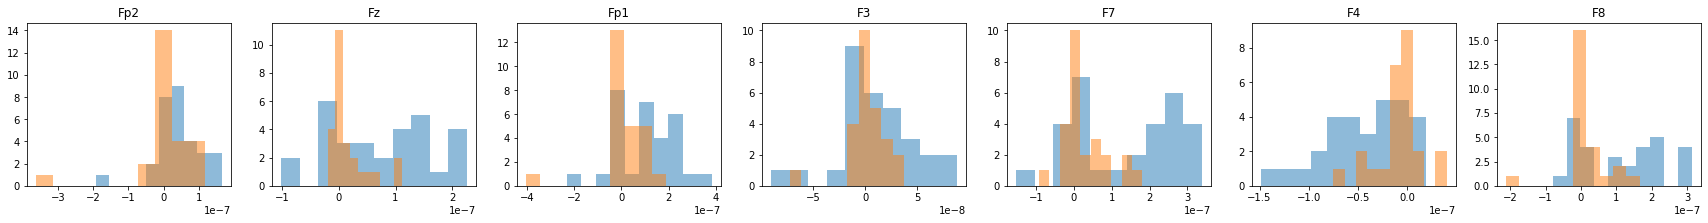

In [214]:
plot_elec_prop(markers_rus_df)

# Cleaned data

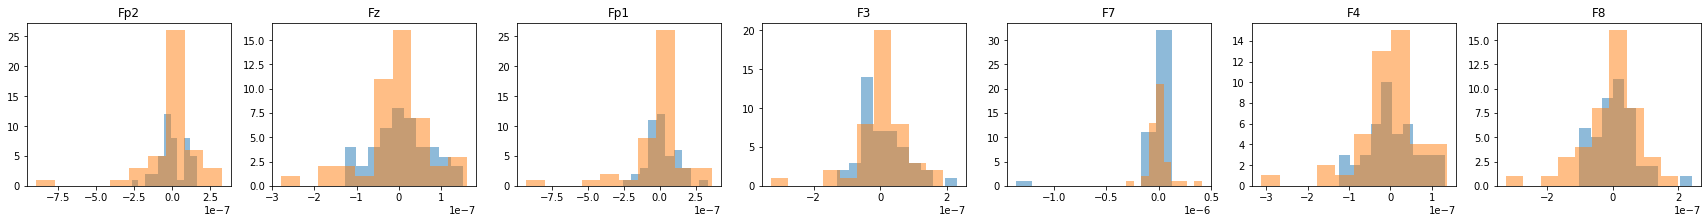

In [215]:
plot_elec_prop(markers_rus_dataframe)

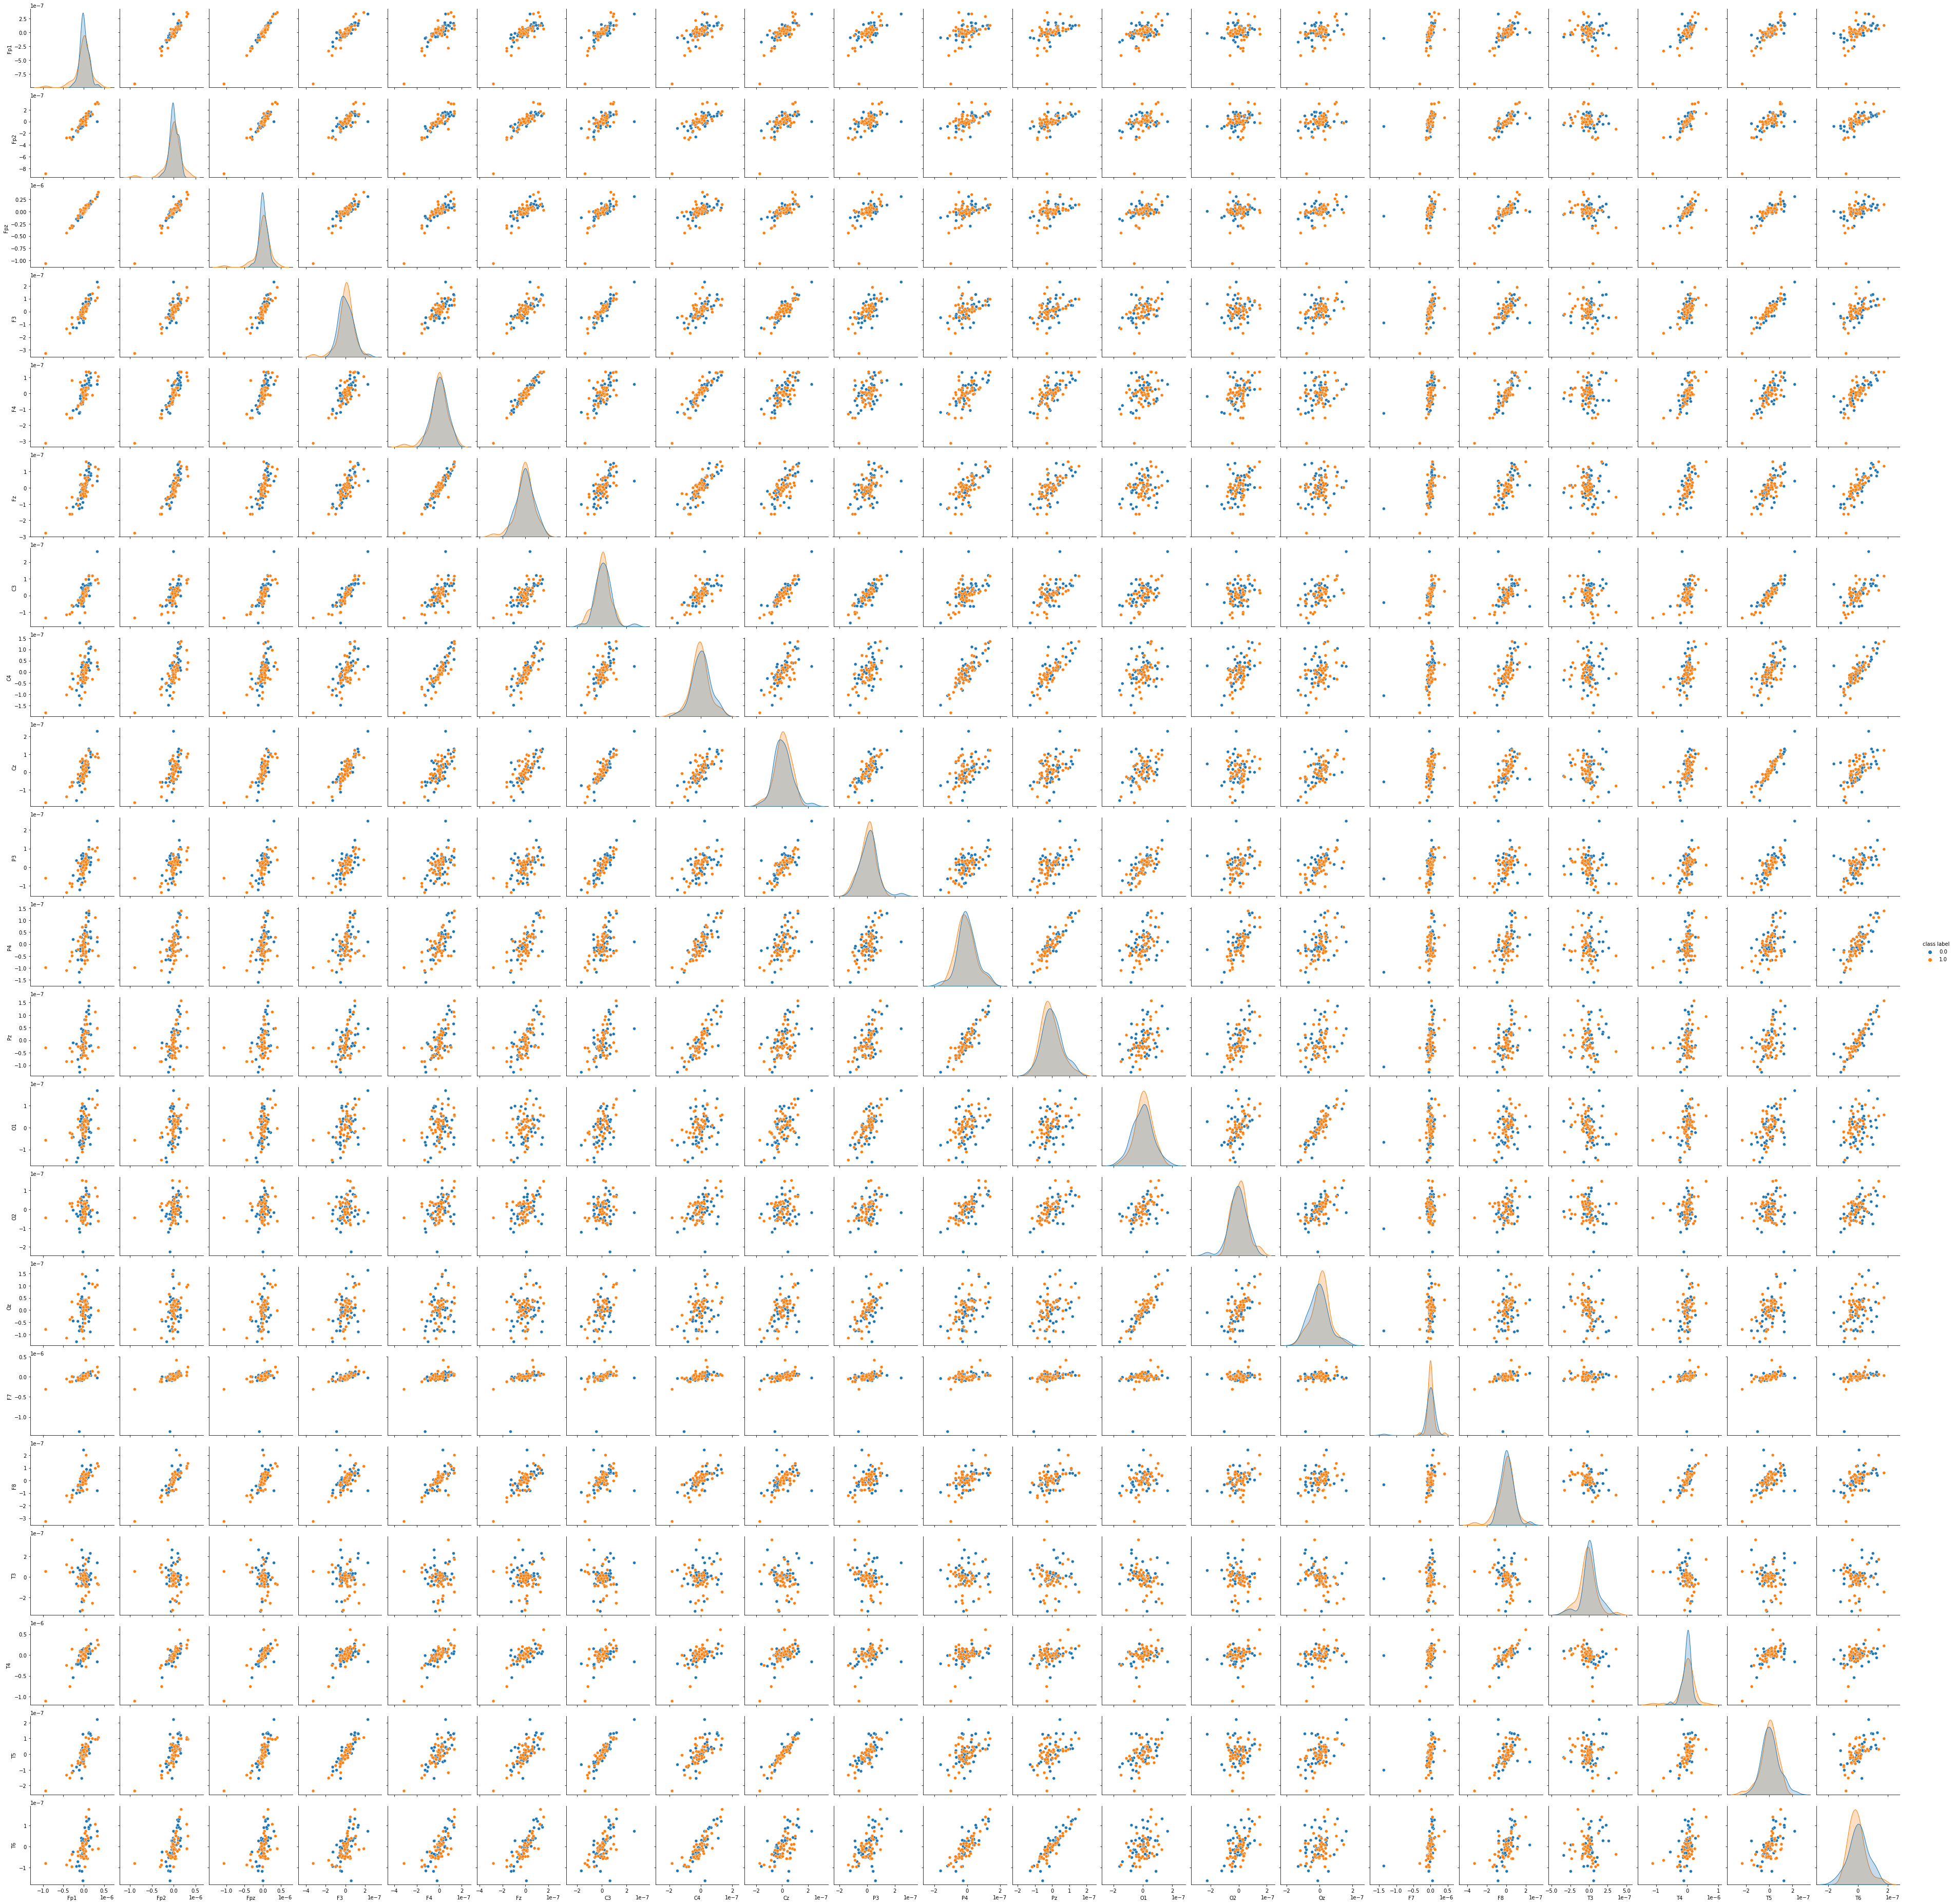

In [23]:
# sns.pairplot(data = markers_rus_dataframe, hue = 'class label');